In [1]:
# Add the location of `nistreamer` package to `sys.path`
import sys
import os
sys.path.append(os.path.join(r'/absolute/path/of/ni-streamer/py_api'))

In [2]:
from nistreamer import NIStreamer
from nistreamer.utils import iplot, RendOption

### Instantiate streamer. Add cards

In [3]:
ni_streamer = NIStreamer()

In [4]:
ao_card = ni_streamer.add_ao_card(max_name='Dev2', samp_rate=1e6)
do_card = ni_streamer.add_do_card(max_name='Dev3', samp_rate=10e6)

Configure inter-card sync:

In [5]:
TRIG_LINE = 'PFI0'

# Start trigger
ao_card.start_trig_out = TRIG_LINE
do_card.start_trig_in = TRIG_LINE

# AO card should start last since it emits start trigger
ni_streamer.starts_last = ao_card.max_name

Print hardware configs:

In [6]:
ni_streamer

NIStreamer instance

AO cards: ['Dev2']
DO cards: ['Dev3']

Hardware settings:
	Calc/write chunk size: 150.0 ms
	   10MHz ref provider: None
	     Starts-last card: Dev2

In [9]:
ao_card

AO card Dev2

Channels: ['ao0']

Hardware settings:
	Sample rate: 1,000,000.0 Sa/s

	Start trigger: 
		 in: None
		out: PFI0
	Sample clock:
		 in: None
		out: None
	10 MHz reference clock: 
		 in: None
		out: see NIStreamer.ref_clk_provider setting

	Min buffer write timeout: 5.0 sec

### Add channels

In [8]:
my_ao = ao_card.add_chan(chan_idx=0, nickname='my_ao')
my_do = do_card.add_chan(port_idx=0, line_idx=0, nickname='my_do')

In [10]:
my_ao

Channel ao0 on card Dev2
Default value: 0.0
  Reset value: 0.0

### Add instructions

In [15]:
ni_streamer.clear_edit_cache()

In [16]:
my_ao.const(t=0, dur=1e-3, val=0.5)
my_do.go_high(t=0.5e-3)
my_ao.sine(t=1e-3, dur=1e-3, freq=1e3, amp=1.0, dc_offs=1.0)
my_do.go_low(t=2.5e-3)

### Compile, preview, and stream

In [17]:
ni_streamer.compile()

0.0025

In [18]:
iplot(chan_list=[my_ao, my_do], nsamps=25000, renderer=RendOption.browser)

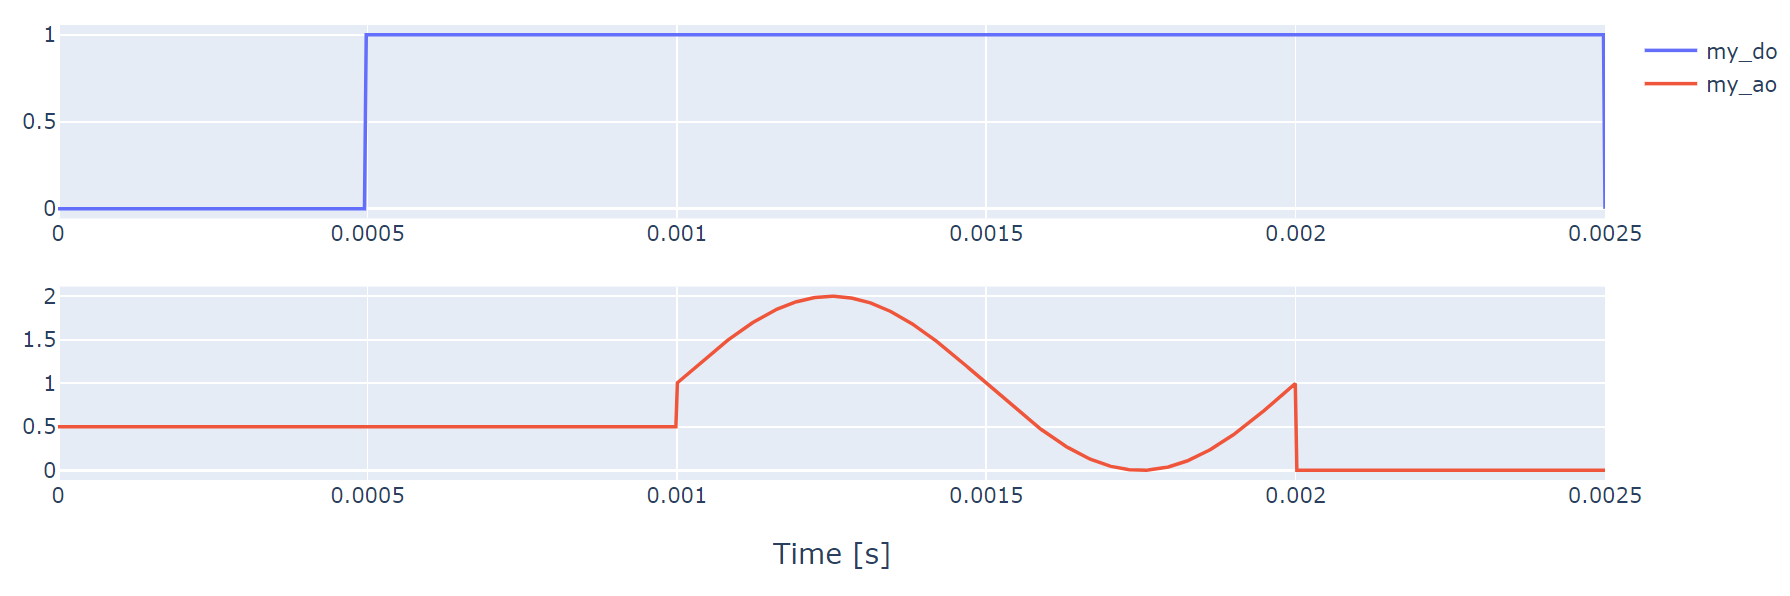

In [19]:
ni_streamer.run()

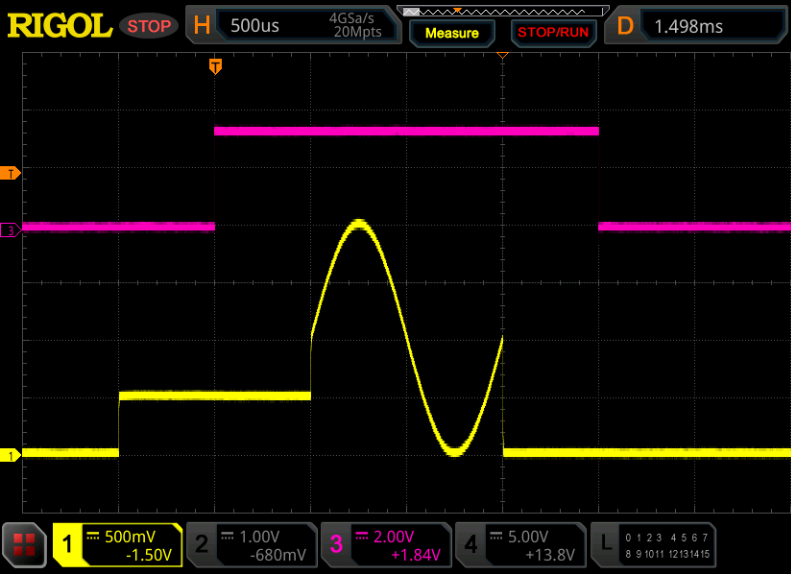

### Reset all cards

In [20]:
ni_streamer.reset_all()